In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

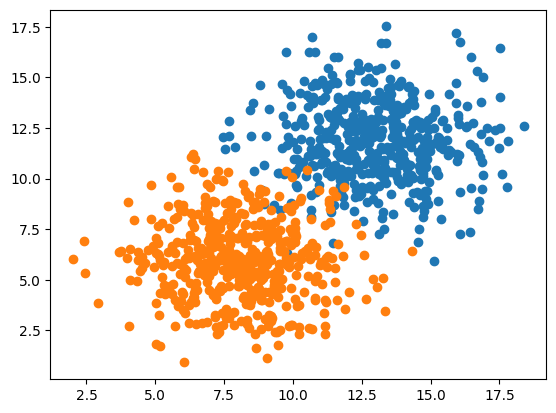

In [ ]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [ ]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation='sigmoid'))
adam = Adam(lr= 0.1)
model.compile(adam, loss= 'binary_crossentropy', metrics=['accuracy'])
h = model.fit(x= X, y= y, verbose= 1, batch_size= 50, epochs= 500, shuffle= 'true')

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/500
20/20 [==============================] - 1s 4ms/step - loss: 0.7421 - accuracy: 0.6750
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4590 - accuracy: 0.8020
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.3663 - accuracy: 0.8980
Epoch 4/500
20/20 [==============================] - 0s 3ms/step - loss: 0.3072 - accuracy: 0.9190
Epoch 5/500
20/20 [==============================] - 0s 3ms/step - loss: 0.2499 - accuracy: 0.9410
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.2231 - accuracy: 0.9540
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.9440
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.1887 - accuracy: 0.9580
Epoch 9/500
20/20 [==============================] - 0s 5ms/step - loss: 0.1770 - accuracy: 0.9620
Epoch 10/500
20/20 [==============================] - 0s 5ms/step - loss: 0.1569 - accuracy: 0.9720
Epoch 11/

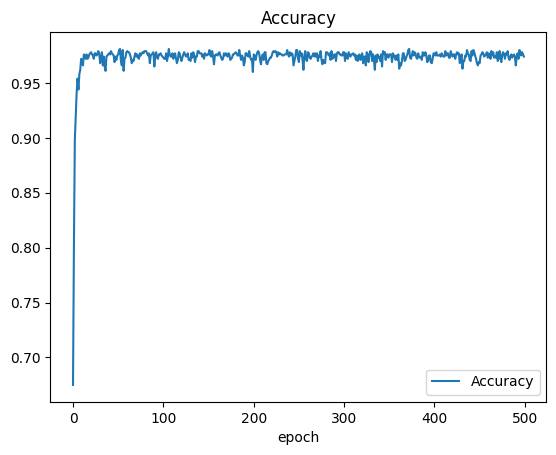

In [ ]:
plt.plot(h.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy'])

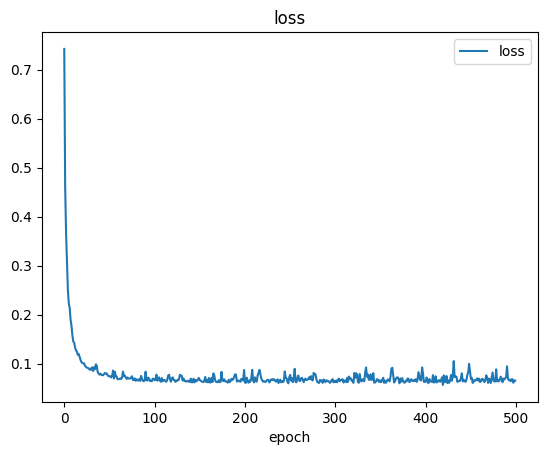

In [ ]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [ ]:
def plot_decision_boundry(X, y, model):
  x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
  y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

79/79 [==============================] - 0s 1ms/step


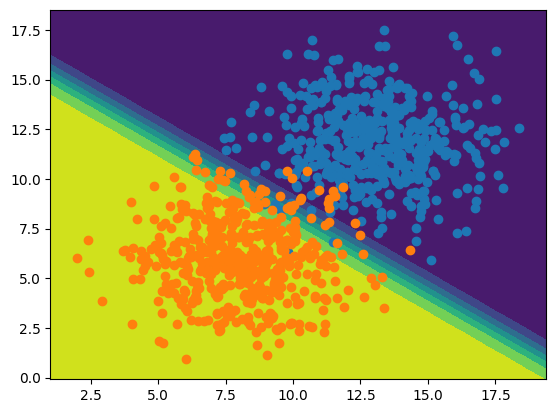

In [ ]:
plot_decision_boundry(X, y, model)

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

1/1 [==============================] - 0s 27ms/step
Prediction is:  [[0.99996984]]


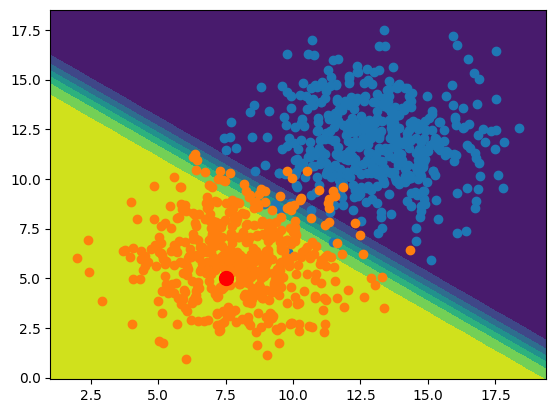

In [ ]:
plot_decision_boundry(X, y, model)

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

x = 7.5
y = 5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker= "o", markersize= 10, color= "red")
print("Prediction is: ", prediction)